In [1]:
import pandas as pd
import numpy as np

# pbp_data = pd.DataFrame()
# years = range(2020, 2021)
# for i in years:
#     url = f"https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_{i}.parquet"
#     print(f"Pulling url {url}")
#     i_data = pd.read_parquet(url, engine='pyarrow')

#     #sort=True eliminates a warning and alphabetically sorts columns
#     pbp_data = pbp_data.append(i_data, sort=True)

# #Give each row a unique index
# pbp_data.reset_index(drop=True, inplace=True)
# pbp_data.head()

decisions = pd.read_csv("2020_fourth_down_plays.csv",index_col=False)
decisions = decisions.loc[:, ~decisions.columns.str.contains('^Unnamed')]
decisions.head()

,game_id,play_id,posteam,defteam,qtr,time,distance,yards_to_goal,score,fg_wp,punt_wp,go_wp,recommendation,choice,decision_value,desc,id
0,401234563,401234563101878901,Georgia Tech,Florida State,1,12:10,1,61,0 - 0,0.393737,0.526602,0.521729,Punt,Go,-0.5,Jordan Mason run for 2 yds to the GTech 41 for...,1
1,401234563,401234563101937401,Georgia Tech,Florida State,1,6:25,13,57,0 - 7,0.184771,0.270650,0.225084,Punt,Punt,4.6,"Pressley Harvin III punt for 52 yds , Travis J...",2
2,401234563,401234563102954601,Georgia Tech,Florida State,2,5:53,9,21,0 - 10,0.219984,NaN,0.237269,Go,FG,-1.7,Jude Kelley 38 Yard Field Goal Missed,3
3,401234563,401234563102985101,Georgia Tech,Florida State,2,2:48,3,50,0 - 10,0.135506,0.157454,0.174837,Go,Punt,-1.7,"Pressley Harvin III punt for 26 yds, punt out-...",4
4,401234563,401234563104914301,Georgia Tech,Florida State,4,9:56,14,15,13 - 13,0.652188,NaN,0.604840,FG,FG,4.7,Jude Kelley 32 yd FG GOOD,5


In [17]:
# "obvious go" == +1.5 WP with "go" rec
obvious_go = decisions[(decisions.decision_value >= 1.5) & (decisions.recommendation == "Go")]
obvious_go

,game_id,play_id,posteam,defteam,qtr,time,distance,yards_to_goal,score,fg_wp,punt_wp,go_wp,recommendation,choice,decision_value,desc,id
16,401234594,401234594102906201,Georgia Tech,Syracuse,2,10:37,8,24,0 - 17,0.076034,NaN,0.100876,Go,Go,2.5,Jeff Sims pass complete to Jahmyr Gibbs for 24...,17
62,401234659,401234659102927708,Georgia Tech,NC State,2,7:22,2,34,7 - 17,0.196947,0.188649,0.213355,Go,Go,1.6,Jordan Mason run for a loss of 1 yard to the N...,63
66,401234659,401234659104966807,Georgia Tech,NC State,4,4:31,1,51,13 - 23,0.017786,0.031222,0.046245,Go,Go,1.5,Jeff Sims pass incomplete to Dontae Smith,67
67,401261245,401261245101964401,Georgia Tech,Pittsburgh,1,4:55,1,1,0 - 3,0.509959,NaN,0.589587,Go,Go,8.0,Jeff Sims 1 Yd Run (Gavin Stewart Kick),68
73,401261245,401261245104929403,Georgia Tech,Pittsburgh,4,7:05,8,38,13 - 26,0.044839,0.044201,0.061724,Go,Go,1.7,Jeff Sims pass complete to Jamious Griffin for...,74


In [3]:
overall_decisions = decisions.groupby("recommendation")
overall_decisions.choice.value_counts(normalize=True).unstack()

choice,FG,Go,Punt
recommendation,,,
FG,0.333333,0.666667,NaN
Go,0.157895,0.684211,0.157895
Punt,NaN,0.120000,0.880000


In [4]:
optimal_decisions = decisions[(decisions.decision_value >= 1.5)].groupby("recommendation")
optimal_decisions.choice.value_counts(normalize=True)

recommendation  choice
FG              FG        1.0
Go              Go        1.0
Punt            Punt      1.0
Name: choice, dtype: float64

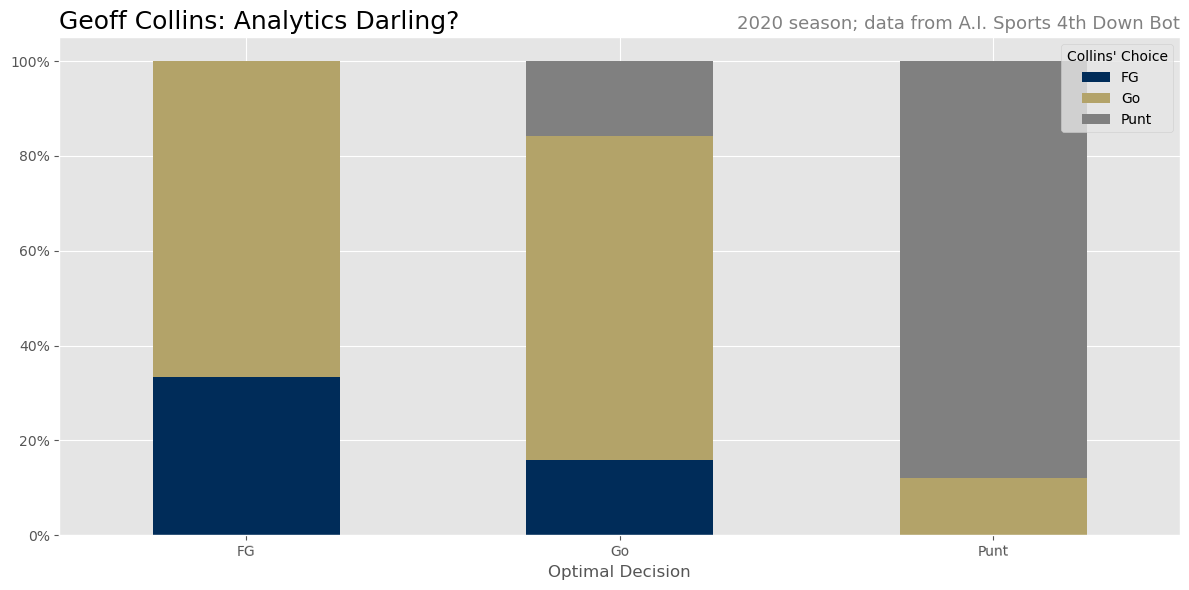

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('ggplot')

sub_df = overall_decisions.choice.value_counts(normalize=True).unstack()
ax = sub_df.plot(kind='bar',stacked=True,rot=1, xlabel="Optimal Decision", figsize=(12,6), color=['#002c59', '#B3A369', 'gray'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(title='Collins\' Choice')
plt.title("Geoff Collins: Analytics Darling?", loc='left', fontsize=18)
plt.title("2020 season; data from A.I. Sports 4th Down Bot", loc='right', fontsize=13, color="gray")
plt.tight_layout()
plt.show()